## Demo of Multimodal functionability of Local Vision-LM

**Multimodal capabilities**:
Llama 3.2 introduces *vision-enabled* models
* that can process and reason over both text and images
* and are of moderate size (11B and 90B parameters resp.)
* thereby allowing **local** processing of use-cases such as visual Q&A, image-captioning, diagram-Analysis etc.

What are these use-cases, you ask? Sure, see below.

[1] **Image-text integration for Image-An**
Llama3.2-VLM (henceforth the 'model' or simply, the 'AI') can analyze images such as maps, graphs, and other forms of visual data,
- can generate insights or summaries based on the visuals
- facilitates processing in healthcare, education, data analytics​ etc.


[2] **Lightweight models for Edge-cases**
Llama3.2-VLM also includes smaller *text-only* models (1B and 3B parms) optimized for mobile and edge devices for tasks like summarization, multilingual text generation, and tool integration on resource-constrained hardware​.
  
    
[3] **Privacy and on-device processing**
These lightweight models run locally-on-device keeping data & processing private. This is especially beneficial for sensitive applications in healthcare and finance.

Lets dive into some Usecases using Llama3.2-VLM.

Here we will first upload the required files on the colab and then will run the model.

#### Uploading utils.py and images folder in the local

**Upload utils.py**

The utils.py file contains several utility functions and modules for interacting with APIs, processing images, and handling other operations.

Utils.py handles API Interactions with the model. The API (Application Programming Interface) is an interface between two systems: user and the model.
- A message packet is constructed (in API URL form) and model version is specified,
- Utils.py's functions send this message packet via the API to the model
- Model's response is returned to user via API by the same route

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving utils.py to utils.py


After uploading utils.py, upload also the **images.zip** folder to colab using the above 'Choose files' option.

Since the images folder was in the zipped format, lets unzip and use it.

P.S. The 'Table of Contents' menu at the extreme left has the 'Files' folder icon at the bottom. Click it and it'll show you what all files we have uploaded successfully to colab.

In [ ]:
import zipfile
import os

# Specify the path to the zip file and the directory where it will be extracted
zip_file_path = '/content/images.zip'
extract_path = '/content/images/'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify the extraction
extracted_files = os.listdir(extract_path)
print(f"Extracted files: {extracted_files}")


Extracted files: ['images', '__MACOSX']


### Setting up the Model Envmt

We have already uploaded the utils.py file. Now lets set the environment. What that means is:

- we will setup a run environment in colab for our model
- we will load the model llama32
- we will define functions to handle encodings and decodings required between python and the model

P.S. In the code below, look at the first 7 lines. Wondering what they mean? One way forward is to copy-paste those lines as-is into an LLM and ask it to explain what is going on. Try and see!

In [ ]:
!pip install python-dotenv
import warnings
warnings.filterwarnings('ignore')
from utils import load_env
load_env()
from utils import llama32 #90B parameter version
import base64

# define func to streamline image encoding for py use
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# def func to embed prompt + image_url into VLM input
def llama32pi(prompt, image_url, model_size=90):
  messages = [
    {
      "role": "user",
      "content": [
        {"type": "text",
          "text": prompt},
        {"type": "image_url",
          "image_url": {
            "url": image_url}
        }
      ]
    },
  ]

  result = llama32(messages, model_size)
  return result

### Fetch an image from a web-URL and analyse it

Click on [this image of a financial statement](https://mi-blogs.s3.amazonaws.com/mi-live/blog/wp-content/uploads/2022/05/20104640/Example-of-balance-sheet-1.webp) and study it.

Or the below code will display it for you anyway.

Think of what Qs a business may have for such input.

I've randomly tried to come up with a few Qs. Feel free to explore further with Qs of your own.

- "Can you extract the key financial figures from this balance sheet (e.g., total assets, liabilities, equity)?"
- "Based on the extracted data, can you calculate the debt-to-equity ratio?"
- "Can you explain the relationship between the current assets and current liabilities?"
- "What does a high inventory turnover ratio suggest about the company's efficiency?"
- "How would you assess the company's liquidity based on this balance sheet?"




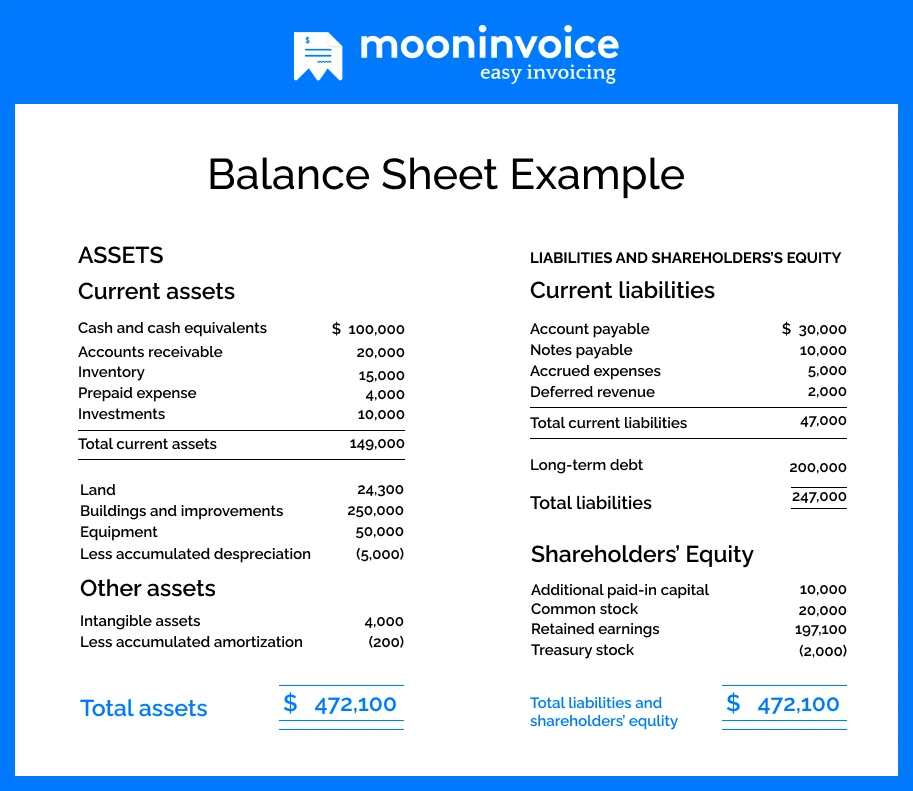

In [ ]:
from PIL import Image
from io import BytesIO
import requests
import base64
from IPython.display import display, HTML

# replace 'image_url' with your image URL
image_url = "https://mi-blogs.s3.amazonaws.com/mi-live/blog/wp-content/uploads/2022/05/20104640/Example-of-balance-sheet-1.webp"  # replace this with your url
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
img

And Orgs would like have 100s upon 100s of such documents, no?

Think of what Qs a business may have for such input.

I've randomly tried to come up with a few Qs. Feel free to explore further with Qs of your own.

- "Can you extract the key financial figures from this balance sheet (e.g., total assets, liabilities, equity)?"
- "Based on the extracted data, can you calculate the debt-to-equity ratio?"
- "Can you explain the relationship between the current assets and current liabilities?"
- "What does a high inventory turnover ratio suggest about the company's efficiency?"
- "How would you assess the company's liquidity based on this balance sheet?"

In [ ]:
import requests
import base64

# same func as above but for URL based images
def encode_image_from_url(image_url):

    # Fetch the image from the URL
    response = requests.get(image_url)

    # Convert the image to base64 encoding
    base64_image = base64.b64encode(response.content).decode('utf-8')

    return base64_image

# Example URL of the image

image_url = "https://mi-blogs.s3.amazonaws.com/mi-live/blog/wp-content/uploads/2022/05/20104640/Example-of-balance-sheet-1.webp"

question0 = "Can you analyse this picture in details. Highlight key findings"
question1 = "Can you extract the key financial figures from this balance sheet (e.g., total assets, liabilities, equity)?"
question2 = "Based on the extracted data, can you calculate the debt-to-equity ratio?"

# Encode the image from the URL
base64_image = encode_image_from_url(image_url)

# Use the encoded image in your llama3.2 query
question = question1
result = llama32pi(question, f"data:image/png;base64,{base64_image}")
print(question, "\n", result)


Can you extract the key financial figures from this balance sheet (e.g., total assets, liabilities, equity)? 
 **Financial Figures from the Balance Sheet**

*   **Total Assets:** $472,100
*   **Total Liabilities and Shareholders' Equity:** $472,100

These figures are directly extracted from the balance sheet, providing a snapshot of the company's financial position.


### The Python Advantage over Chat Interfaces

"Ah, but this is just image-Analysis which we can anyway get with GPT4 or Gemini directly via chat window, no?", you say.

Fair point. Why go through this much colab and pythin trouble if I can just copy-paste over chat-interfaces?

OK, what if you had scores, no hundreds of such documents or images to analyze? What if for each document, you had not just a handful but a 100 Qs to ask?

That's where python's systematic programmability wins out. Below, I loop over our tiny example: 2 Qs asked of 1 image. And I could just as easily loop this over 100s of queries over 100s of images (compute permitting).

Behold.

In [ ]:
import time

# build a list of questions
questions = ["Based on the extracted data, can you calculate the debt-to-equity ratio?",
    "How would you assess the company's liquidity based on this balance sheet?"]

# build a list of images to be analyzed
base64_image_list = [base64_image]  # only 1 we had this time

# Use a loop to cycle each query on each image
for question in questions:
    for base64_image in base64_image_list:
        result = llama32pi(question, f"data:image/png;base64,{base64_image}")
        print(question, "\n", result, "\n")
        time.sleep(15) # delibrate pause to beat query rate-limit!
    print("================================================================")

Based on the extracted data, can you calculate the debt-to-equity ratio? 
 To calculate the debt-to-equity ratio, we need to divide the total liabilities by the shareholders' equity.

**Step 1: Identify the Total Liabilities**

From the balance sheet, we can see that the total liabilities are $247,000.

**Step 2: Identify the Shareholders' Equity**

From the balance sheet, we can see that the shareholders' equity is $472,100.

**Step 3: Calculate the Debt-to-Equity Ratio**

Debt-to-Equity Ratio = Total Liabilities / Shareholders' Equity

Debt-to-Equity Ratio = $247,000 / $472,100

Debt-to-Equity Ratio ≈ 0.523

Therefore, the debt-to-equity ratio is approximately 0.523 or 52.3%. This means that for every dollar of shareholders' equity, the company has approximately 52 cents of debt. 

How would you assess the company's liquidity based on this balance sheet? 
 To assess the company's liquidity, we need to calculate the current ratio. The current ratio is calculated by dividing the total 

**Usecase 1: Lets identify the plant**

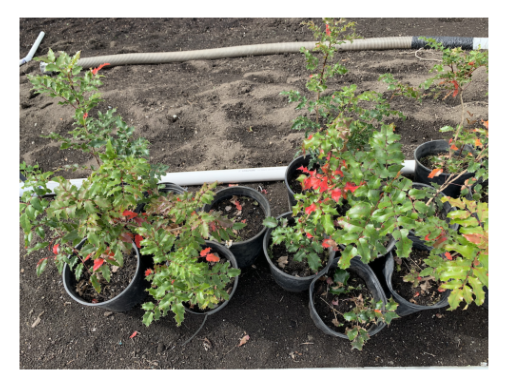

In [ ]:
from utils import disp_image

#disp_image(f"/content/images/plant2.png") #copy the path of the image from the image folder

# for MacOS folks
disp_image(f"/content/images/images/plant2.png") #copy the path of the image from the image folder

In [ ]:
question = "What is this plant?"

# alt Qs
question1 = "How many plants do you see?"
question2 = "What kind of soil is that on the ground?"

prompt0 = question2 # alternately replace 'question' above with 'question1' in prompt0

base64_image = encode_image(f"/content/images/images/plant2.png")
results = llama32pi(prompt0, f"data:image/jpeg;base64,{base64_image}")

print(prompt0, '\n', results)

What kind of soild is that on the ground? 
 The soil on the ground appears to be a dark brown or black color, which suggests that it may be rich in organic matter. The texture of the soil also appears to be relatively loose and well-draining, which could indicate that it is a sandy or loamy soil. Overall, the soil on the ground appears to be a fertile and well-suited for plant growth.


**Usecase 2: Lets identify the artist who painted this picture**

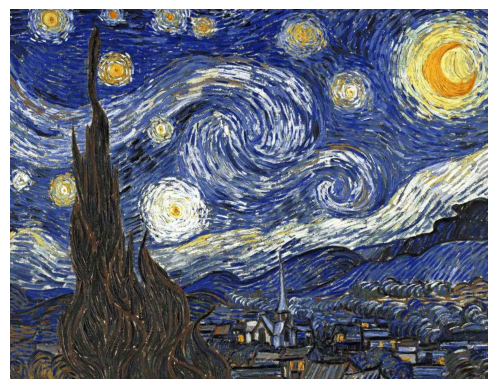

In [ ]:
disp_image("/content/images/s1.jpg") #copy the path of the image from the image folder

In [ ]:
question = "Who is the artist?"

base64_image = encode_image(f"/content/images/s1.jpg")
results = llama32pi(question, f"data:image/jpeg;base64,{base64_image}")

print(results)

The painting 'The Starry Night' is the work of the renowned Dutch post-impressionist artist Vincent van Gogh. Created in June 1889, it is one of Van Gogh's most famous paintings and is widely considered one of the most iconic and influential works in the history of Western art.


**Use Case 3: Choosing the right drink**

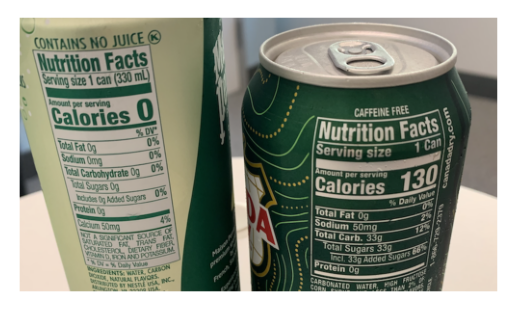

In [ ]:
disp_image("/content/images/drinks.png") #copy the path

In [ ]:
question = "I am on a diet. Which drink should I drink?"
base64_image = encode_image("/content/images/drinks.png")
result = llama32pi(question, f"data:image/png;base64,{base64_image}")
print(result)

**Comparing the Nutritional Content of Two Drinks**

To determine which drink is more suitable for your diet, let's compare the nutritional content of the two options.

**Drink 1:**

* Calories: 0
* Fat: 0g
* Sodium: 0mg
* Carbohydrates: 0g
* Sugars: 0g
* Protein: 0g

**Drink 2:**

* Calories: 130
* Fat: 0g
* Sodium: 50mg
* Carbohydrates: 33g
* Sugars: 33g
* Protein: 0g

Based on the nutritional information, **Drink 1** appears to be the better choice for your diet. It contains zero calories, fat, sodium, carbohydrates, sugars, and protein, making it a very low-calorie and low-nutrient beverage. In contrast, **Drink 2** contains 130 calories, 50mg of sodium, 33g of carbohydrates, and 33g of sugars, making it a higher-calorie and higher-sugar beverage.

Therefore, if you are on a diet and looking to reduce your calorie and sugar intake, **Drink 1** would be the better choice. However, it's important to note that both drinks are likely to be highly processed and may not provide any signi

**Usecase 4: OCR Recognition**

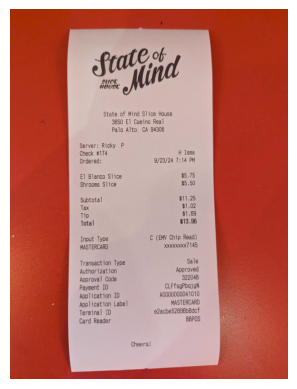

In [ ]:
disp_image("/content/images/receipt-1.jpg")

In [ ]:
question = "Do the mathematical calculations for this receipt?"
base64_image = encode_image("/content/images/receipt-1.jpg")
result = llama32pi(question, f"data:image/png;base64,{base64_image}")
print(result)

To calculate the total cost of the items on this receipt, we need to add up the prices of each item. 

The El Blanco Slice costs $5.75 and the Shrooms Slice costs $5.50. The subtotal is $11.25. 

Next, we need to calculate the tax. The tax rate is 8.25%, which is $1.02. 

Finally, we need to add the tip. The tip is $1.69. 

Therefore, the total cost of the items on this receipt is $13.96.


**USeCase 5: Balance sheet analysis**

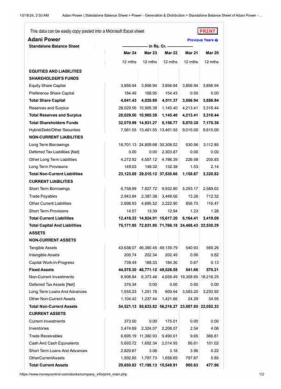

In [ ]:
disp_image("/content/images/s2.jpg")

In [ ]:
question = "Can you analyse this balance sheet in details. Highlight key findings"
base64_image = encode_image("/content/images/s2.jpg")
result = llama32pi(question, f"data:image/png;base64,{base64_image}")
print(result)

**Balance Sheet Analysis: Adani Power**

**Overview**

The balance sheet presents a comprehensive financial snapshot of Adani Power as of March 24, 2024. The data is organized into three main sections: Equities and Liabilities, Current Liabilities, and Non-Current Assets.

**Equities and Liabilities**

*   **Shareholder's Funds**: The total shareholder's funds amount to ₹32,070.99 crore, comprising equity share capital, preference share capital, reserves and surplus, and total reserves and surplus.
*   **Non-Current Liabilities**: Long-term borrowings stand at ₹18,701.13 crore, while deferred tax liabilities (Net) are ₹0.00 crore. Other long-term liabilities amount to ₹4,272.92 crore, and long-term provisions total ₹149.03 crore.

**Current Liabilities**

*   **Short Term Borrowings**: ₹6,758.99 crore
*   **Trade Payables**: ₹2,943.84 crore
*   **Other Current Liabilities**: ₹2,908.93 crore
*   **Short Term Provisions**: ₹14.57 crore

**Non-Current Assets**

*   **Tangible Assets**: ₹4

**Usecase 6: Identify food in the refrigerator**

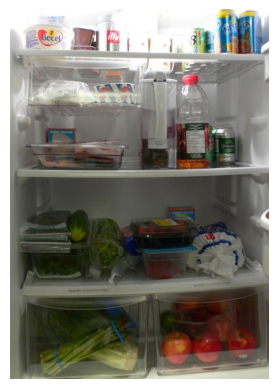

In [ ]:
disp_image("/content/images/fridge-3.jpg")

In [ ]:
question = ("What're in the fridge? What kind of food can be made? Give "
            "me 2 examples, based on only the ingredients in the fridge.")
base64_image = encode_image("images/fridge-3.jpg")
result = llama32pi(question, f"data:image/jpg;base64,{base64_image}")
print(result)

The fridge contains a variety of ingredients, including vegetables such as lettuce, cucumbers, and tomatoes, as well as fruits like apples. There are also beverages like juice and soda, and dairy products like yogurt and cheese. Additionally, there are some packaged foods like crackers and cookies.

With these ingredients, two possible dishes that can be prepared are:

1. A fresh salad with lettuce, cucumbers, and tomatoes, topped with cheese and served with a side of crackers.
2. A fruit platter with sliced apples, accompanied by a dollop of yogurt for dipping.

These dishes showcase the versatility of the ingredients in the fridge and offer healthy and satisfying options for a quick meal or snack.


A followup question

In [ ]:
new_question = "is there banana in the fridge? where?"
messages = [
  {"role": "user", "content": [
      {"type": "text", "text": question},
      {"type": "image_url", "image_url": {"url": f"data:image/jpg;base64,{base64_image}"}}
  ]},
  {"role": "assistant", "content": result},
  {"role": "user", "content": new_question}
]
result = llama32(messages)
print(result)

There is no banana in the fridge. The only fruits visible are apples, which are located in the bottom right corner of the fridge.


**Usecase 7: Analysing a chart**

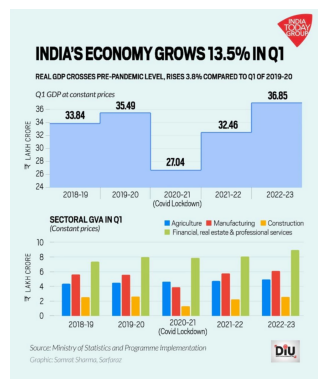

In [ ]:
disp_image("/content/images/chart.png")

In [ ]:
question = "Can you analyse this chart in details. Highlight key findings"
base64_image = encode_image("/content/images/s2.jpg")
result = llama32pi(question, f"data:image/png;base64,{base64_image}")
print(result)

**Adani Power Balance Sheet Analysis**

**Overview**

The balance sheet presents a comprehensive financial snapshot of Adani Power as of March 24, 2024. The data is organized into three main sections: Equities and Liabilities, Current Liabilities, and Non-Current Assets.

**Equities and Liabilities**

*   **Shareholder's Funds**: The total shareholder's funds amount to ₹32,070.99 crore, comprising equity share capital, preference share capital, reserves and surplus, and total reserves and surplus.
*   **Non-Current Liabilities**: Long-term borrowings stand at ₹18,701.13 crore, while deferred tax liabilities (Net) are ₹0.00 crore. Other long-term liabilities total ₹4,272.92 crore, and long-term provisions amount to ₹149.03 crore.

**Current Liabilities**

*   **Short Term Borrowings**: ₹6,758.99 crore
*   **Trade Payables**: ₹2,943.84 crore
*   **Other Current Liabilities**: ₹2,908.93 crore
*   **Short Term Provisions**: ₹14.57 crore

**Non-Current Assets**

*   **Tangible Assets**: ₹43